In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
# check shape of dataframe
df.shape

(7109, 22)

**We are selecting only those columns which are important**

In [4]:
# drop unnecessary columns and create new dataframe with important data
df2 = df.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis = 1)

In [5]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250


In [6]:
# check shape of new dataframe
df2.shape

(7109, 17)

In [7]:
# check info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  REG_FEE        7109 non-null   int64  
 15  COMMIS         7109 non-null   int64  
 16  SALES_PRICE    7109 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 944

# Data Cleaning

In [8]:
# check null values
df2.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
# drop null values
df2.dropna(inplace=True)

In [10]:
# check null values again after drop
df2.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

# Textual Data Manipulation

**Area Column Manipulation**

In [11]:
# check unique values in area column
df2['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [12]:
# replace wrong data with real data
df2['AREA'] = df2['AREA'].replace('Adyr','Adyar')
df2['AREA'] = df2['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet')
df2['AREA'] = df2['AREA'].replace('Karapakam','Karapakkam')
df2['AREA'] = df2['AREA'].replace('KKNagar','KK Nagar')
df2['AREA'] = df2['AREA'].replace('Ann Nagar','Anna Nagar')
df2['AREA'] = df2['AREA'].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar')
df2['AREA'] = df2['AREA'].replace('TNagar','T Nagar')
df2['AREA'] = df2['AREA'].replace('Velchery','Velachery')

In [13]:
# check unique values in area column after replacing
df2['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

**Sale Condition Column Manipulation**

In [14]:
# check unique values in sale condition column
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [15]:
# replace wrong data with actual data
df2['SALE_COND'] = df2['SALE_COND'].replace('Adj Land','AdjLand')
df2['SALE_COND'] = df2['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')
df2['SALE_COND'] = df2['SALE_COND'].replace('Ab Normal','AbNormal')

In [16]:
# check unique values in sale condition column after replacing
df2['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

**Park Facility Column Manipulation**

In [17]:
# check unique values in park facility column
df2['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [18]:
# replace wrong data with actual data
df2['PARK_FACIL'] = df2['PARK_FACIL'].replace('Noo','No')

In [19]:
# check unique values in park facility column after replacing
df2['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

**Build Type Column Manipulation**

In [20]:
# check unique values in build type column
df2['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [21]:
df2['BUILDTYPE'] = df2['BUILDTYPE'].replace('Comercial','Commercial')
df2['BUILDTYPE'] = df2['BUILDTYPE'].replace('Other','Others')

In [22]:
# check unique values in build type column after replacing
df2['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

**utility available Column Manipulation**

In [23]:
# check unique values in utility aviliable column
df2['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [24]:
df2['UTILITY_AVAIL'] = df2['UTILITY_AVAIL'].replace('All Pub', 'AllPub')

In [25]:
# check unique values in utility aviliable column after replacing
df2['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

**Street Column Manipulation**

In [26]:
# check unique values in street column
df2['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [27]:
df2['STREET'] = df2['STREET'].replace('Pavd','Paved')
df2['STREET'] = df2['STREET'].replace('NoAccess','No Access')

In [28]:
# check unique values in street column after replacing
df2['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

**Mzzone Column Manipulation**

In [29]:
# check unique values in mzzone column
df2['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Threre is no any wrong values in mzzone column

**Sale Date Column Manipulation**

In [30]:
# change date format string to datetime
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'])

**Build Date Column Manipulation**

In [31]:
# change date format string to datetime
df2['DATE_BUILD'] = pd.to_datetime(df2['DATE_BUILD'])

# Numerical Data Manipulation

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\si

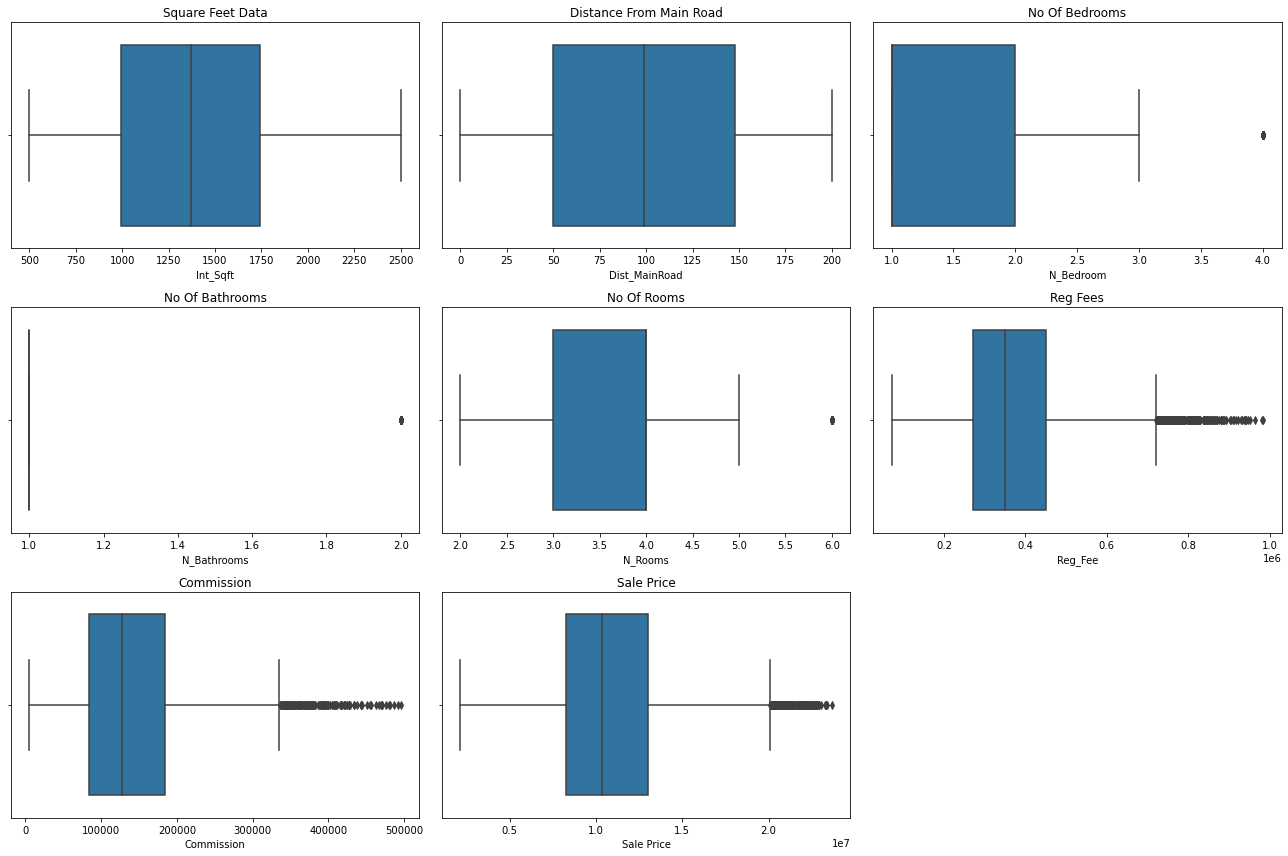

In [32]:
# find outliers by boxplot
plt.figure(figsize = (18,12))

# for int sqft column
plt.subplot(3,3,1)
sns.boxplot(df2['INT_SQFT'])
plt.title('Square Feet Data')
plt.xlabel('Int_Sqft')

# for dist main road column
plt.subplot(3,3,2)
sns.boxplot(df2['DIST_MAINROAD'])
plt.title('Distance From Main Road')
plt.xlabel('Dist_MainRoad')

# for n bedroom column
plt.subplot(3,3,3)
sns.boxplot(df2['N_BEDROOM'])
plt.title('No Of Bedrooms')
plt.xlabel('N_Bedroom')

# for n bathroom column
plt.subplot(3,3,4)
sns.boxplot(df2['N_BATHROOM'])
plt.title('No Of Bathrooms')
plt.xlabel('N_Bathrooms')

# for n room column
plt.subplot(3,3,5)
sns.boxplot(df2['N_ROOM'])
plt.title('No Of Rooms')
plt.xlabel('N_Rooms')

# for reg fees column
plt.subplot(3,3,6)
sns.boxplot(df2['REG_FEE'])
plt.title('Reg Fees')
plt.xlabel('Reg_Fee')

# for commis column
plt.subplot(3,3,7)
sns.boxplot(df2['COMMIS'])
plt.title('Commission')
plt.xlabel('Commission')

# for sales price column
plt.subplot(3,3,8)
sns.boxplot(df2['SALES_PRICE'])
plt.title('Sale Price')
plt.xlabel('Sale Price')

plt.tight_layout()
plt.show()

We can clearly see that, there are some outliers so first we have to clean them

# Capping Of Outliers

In [33]:
# capping of outliers in reg fees column
q1 = df2['REG_FEE'].quantile(0.25)
q3 = df2['REG_FEE'].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df2['REG_FEE'] = df2['REG_FEE'].apply(lambda x: lower_limit if x<lower_limit else x)
df2['REG_FEE'] = df2['REG_FEE'].apply(lambda x: upper_limit if x>upper_limit else x)

# capping of outliers in commission column
q1 = df2['COMMIS'].quantile(0.25)
q3 = df2['COMMIS'].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df2['COMMIS'] = df2['COMMIS'].apply(lambda x: lower_limit if x<lower_limit else x)
df2['COMMIS'] = df2['COMMIS'].apply(lambda x: upper_limit if x>upper_limit else x)

# capping of outliers in sales price column
q1 = df2['SALES_PRICE'].quantile(0.25)
q3 = df2['SALES_PRICE'].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df2['SALES_PRICE'] = df2['SALES_PRICE'].apply(lambda x: lower_limit if x<lower_limit else x)
df2['SALES_PRICE'] = df2['SALES_PRICE'].apply(lambda x: upper_limit if x>upper_limit else x)

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


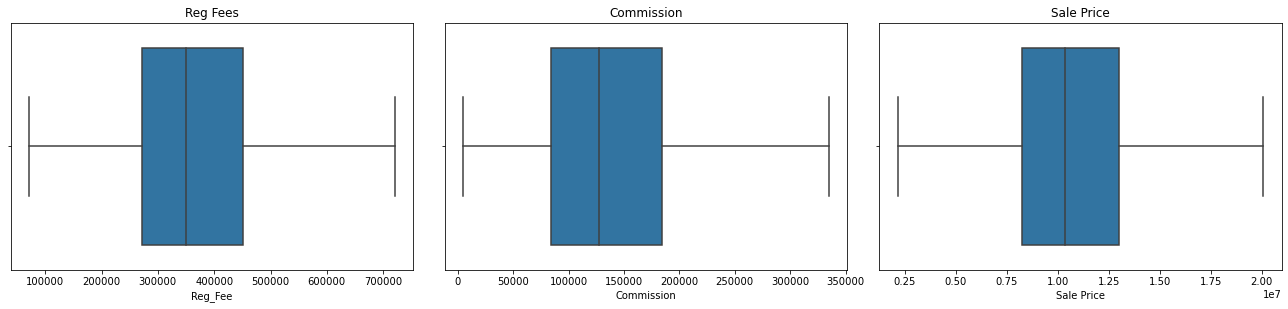

In [34]:
# find outliers by boxplot after capping
plt.figure(figsize = (18,12))

# for reg fees column
plt.subplot(3,3,1)
sns.boxplot(df2['REG_FEE'])
plt.title('Reg Fees')
plt.xlabel('Reg_Fee')

# for commission column
plt.subplot(3,3,2)
sns.boxplot(df2['COMMIS'])
plt.title('Commission')
plt.xlabel('Commission')

# for sales price column
plt.subplot(3,3,3)
sns.boxplot(df2['SALES_PRICE'])
plt.title('Sale Price')
plt.xlabel('Sale Price')

plt.tight_layout()
plt.show()

So now we done capping of all outliers with upper limit data

In [35]:
df2.shape

(7103, 17)

In [36]:
df2.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000.00,144400.0,7600000.0
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,720157.75,304049.0,20079187.5
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094.00,92114.0,13159200.0
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321.00,77042.0,9630290.0
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000.00,74063.0,7406250.0


# EDA

**Visualization Of Individual Column Data**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\si

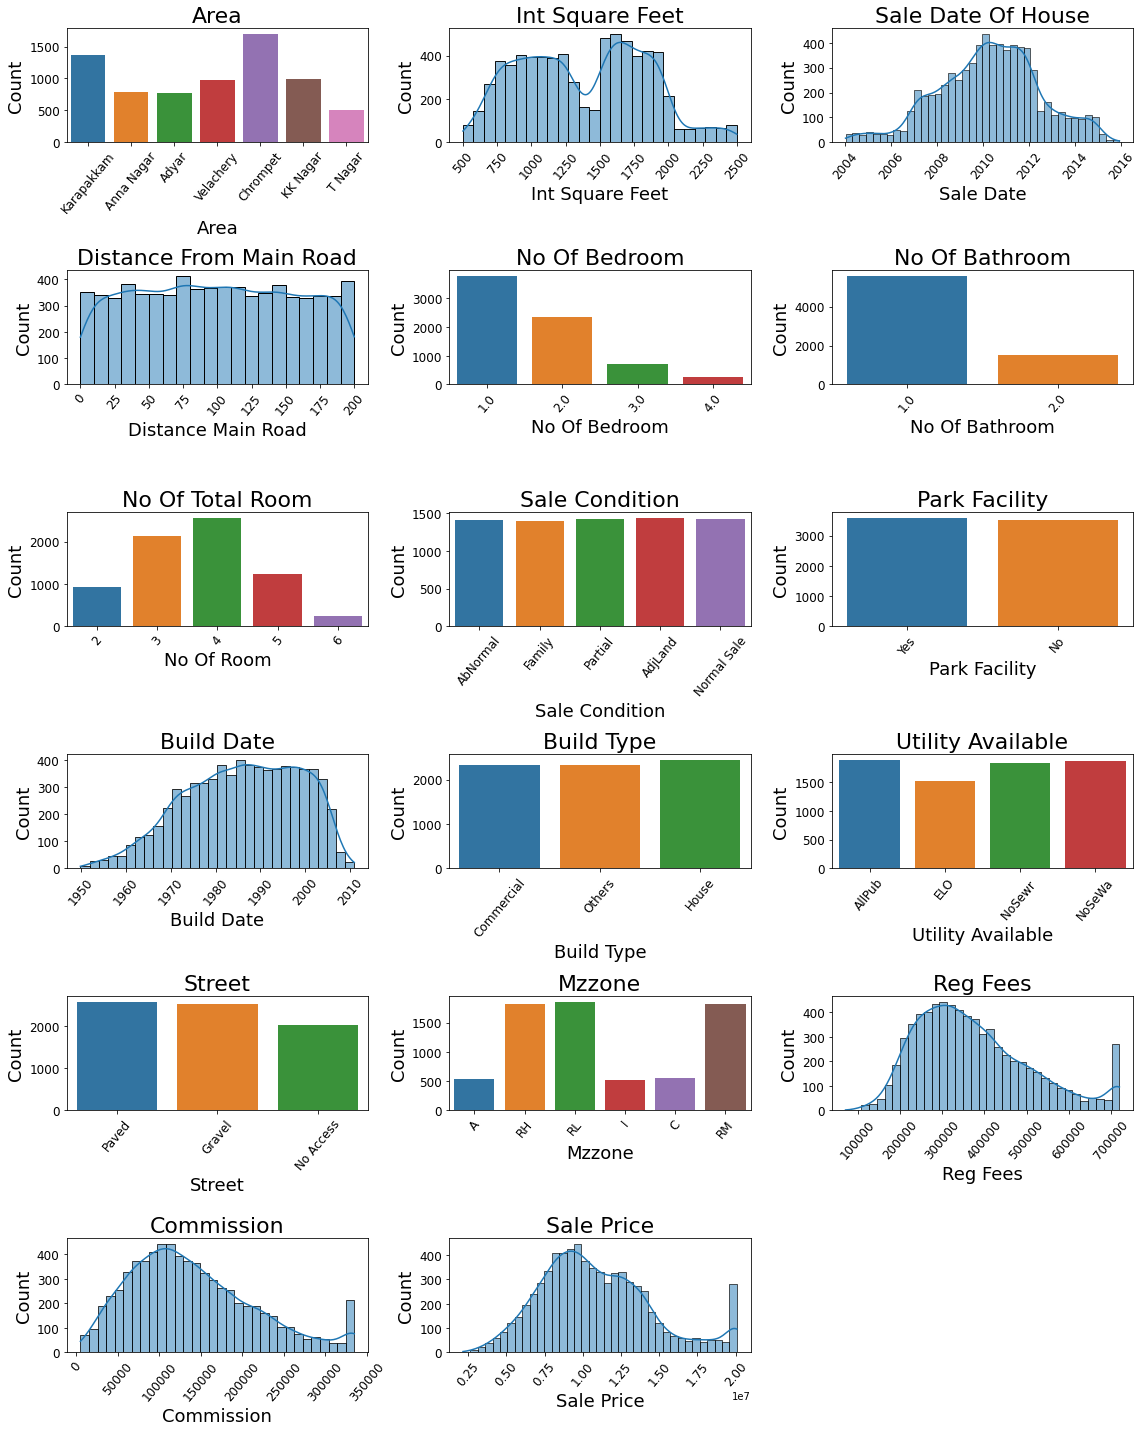

In [37]:
plt.figure(figsize = (16,20))
# Area
plt.subplot(6,3,1)
sns.countplot(df2['AREA'])
plt.title('Area',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# int square feet
plt.subplot(6,3,2)
sns.histplot(df2['INT_SQFT'],kde = True)
plt.title('Int Square Feet',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Int Square Feet',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# sale date
plt.subplot(6,3,3)
sns.histplot(df2['DATE_SALE'],kde = True)
plt.title('Sale Date Of House',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Date',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# dist main road
plt.subplot(6,3,4)
sns.histplot(df2['DIST_MAINROAD'],kde = True)
plt.title('Distance From Main Road',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Distance Main Road',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# n bedroom
plt.subplot(6,3,5)
sns.countplot(df2['N_BEDROOM'])
plt.title('No Of Bedroom',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# n bathroom
plt.subplot(6,3,6)
sns.countplot(df2['N_BATHROOM'])
plt.title('No Of Bathroom',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bathroom',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# n room
plt.subplot(6,3,7)
sns.countplot(df2['N_ROOM'])
plt.title('No Of Total Room',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Room',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# sale condition
plt.subplot(6,3,8)
sns.countplot(df2['SALE_COND'])
plt.title('Sale Condition',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Condition',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# park facility
plt.subplot(6,3,9)
sns.countplot(df2['PARK_FACIL'])
plt.title('Park Facility',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Park Facility',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Build date
plt.subplot(6,3,10)
sns.histplot(df2['DATE_BUILD'],kde = True)
plt.title('Build Date',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Build Date',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Build type
plt.subplot(6,3,11)
sns.countplot(df2['BUILDTYPE'])
plt.title('Build Type',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Build Type',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# utility available
plt.subplot(6,3,12)
sns.countplot(df2['UTILITY_AVAIL'])
plt.title('Utility Available',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Utility Available',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Street
plt.subplot(6,3,13)
sns.countplot(df2['STREET'])
plt.title('Street',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Street',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Mzzone
plt.subplot(6,3,14)
sns.countplot(df2['MZZONE'])
plt.title('Mzzone',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Mzzone',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Reg fees
plt.subplot(6,3,15)
sns.histplot(df2['REG_FEE'],kde = True)
plt.title('Reg Fees',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Reg Fees',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Commission
plt.subplot(6,3,16)
sns.histplot(df2['COMMIS'],kde = True)
plt.title('Commission',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Commission',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

# Sale Price
plt.subplot(6,3,17)
sns.histplot(df2['SALES_PRICE'],kde = True)
plt.title('Sale Price',fontsize = 22)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Price',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

plt.tight_layout()
plt.show()

**Now We Will Try To Find The Relationship Between Features**

**Area Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anacond

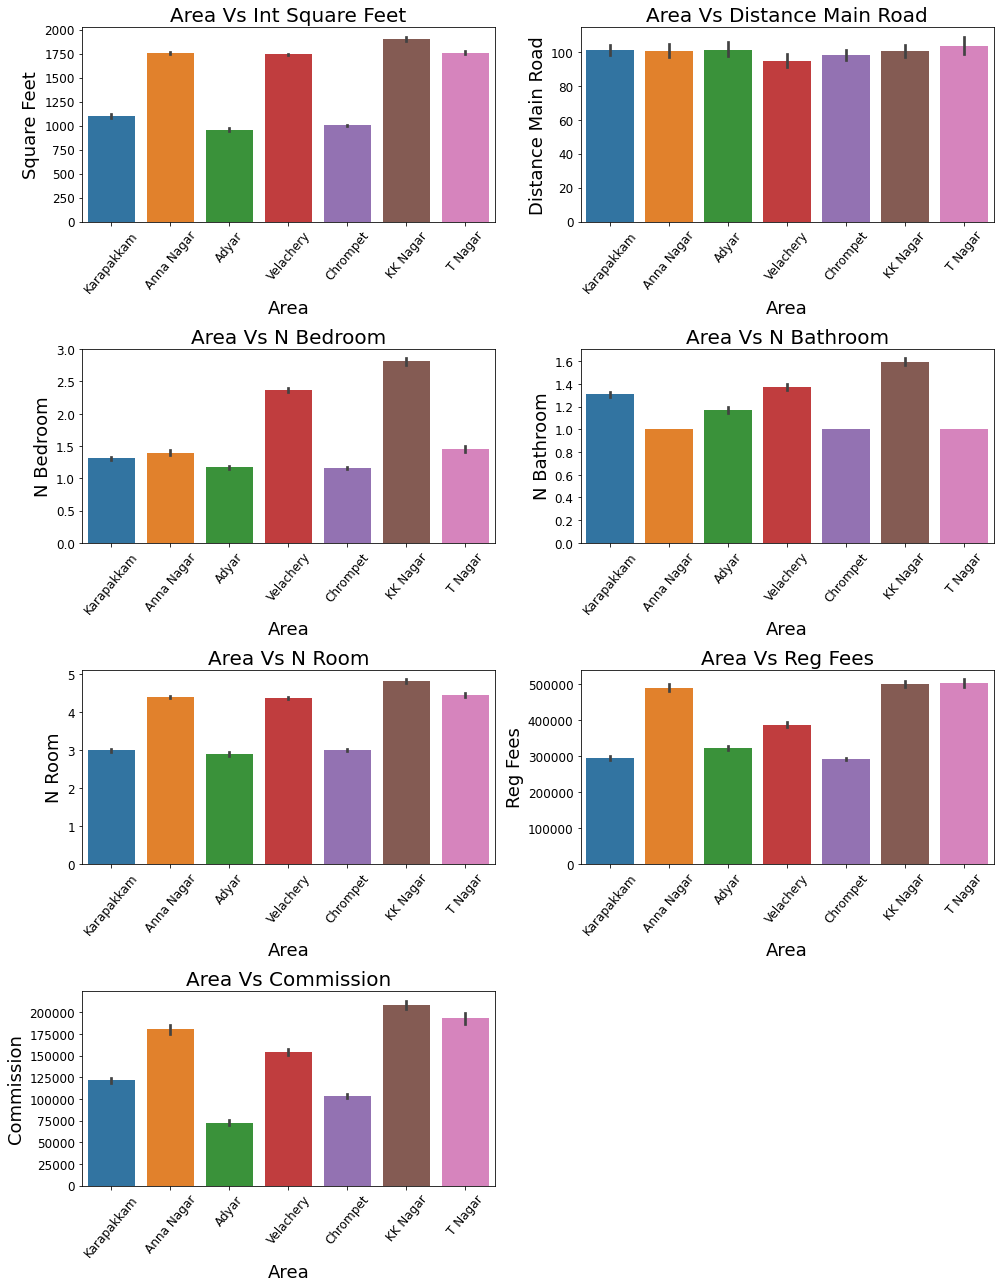

In [38]:
plt.figure(figsize = (14,18))

# Area vs square feet
plt.subplot(4,2,1)
sns.barplot(df2.AREA,df2.INT_SQFT )
plt.title('Area Vs Int Square Feet',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Area vs distance main road
plt.subplot(4,2,2)
sns.barplot(df2.AREA,df2.DIST_MAINROAD )
plt.title('Area Vs Distance Main Road',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Distance Main Road',fontsize = 18)

# Area vs bedroom
plt.subplot(4,2,3)
sns.barplot(df2.AREA,df2.N_BEDROOM )
plt.title('Area Vs N Bedroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('N Bedroom',fontsize = 18)

# Area vs bathroom
plt.subplot(4,2,4)
sns.barplot(df2.AREA,df2.N_BATHROOM )
plt.title('Area Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('N Bathroom',fontsize = 18)

# Area vs room
plt.subplot(4,2,5)
sns.barplot(df2.AREA,df2.N_ROOM )
plt.title('Area Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('N Room',fontsize = 18)

# Area vs reg fees
plt.subplot(4,2,6)
sns.barplot(df2['AREA'],df2['REG_FEE'])
plt.title('Area Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Reg Fees',fontsize = 18)

# Area vs commission
plt.subplot(4,2,7)
sns.barplot(df2['AREA'],df2['COMMIS'])
plt.title('Area Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Area',fontsize = 18)
plt.ylabel('Commission',fontsize = 18)

plt.tight_layout()
plt.show()

**Int Square Feet Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anacond

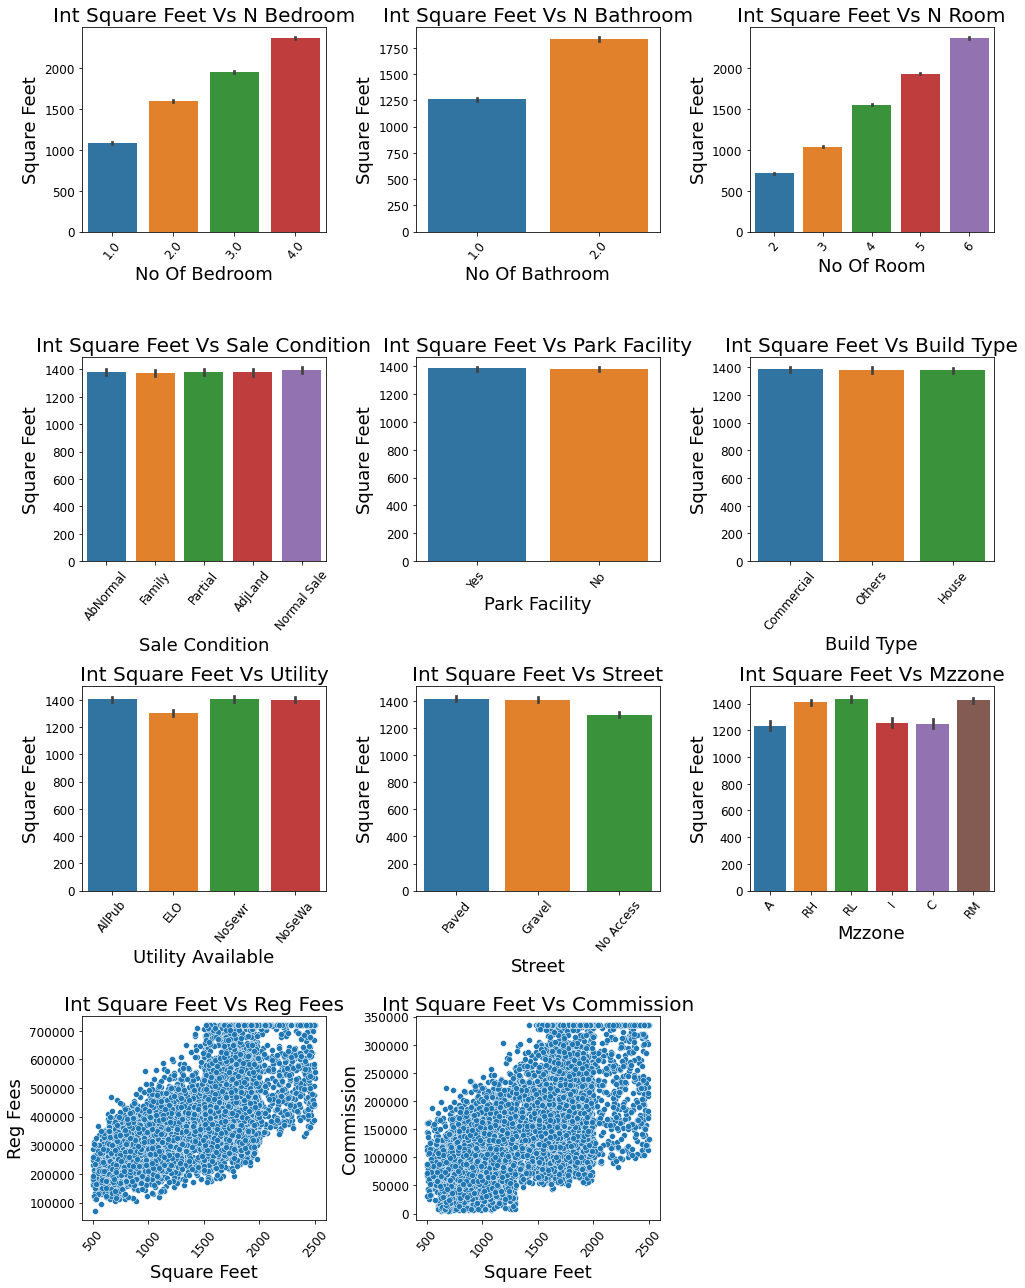

In [39]:
plt.figure(figsize = (14,18))

# square feet vs no of bedroom
plt.subplot(4,3,1)
sns.barplot(df2['N_BEDROOM'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs N Bedroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# square feet vs no of bathroom
plt.subplot(4,3,2)
sns.barplot(df2['N_BATHROOM'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bathroom',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# square feet vs no of bathroom
plt.subplot(4,3,3)
sns.barplot(df2['N_ROOM'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Room',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs sale condition
plt.subplot(4,3,4)
sns.barplot(df2['SALE_COND'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Sale Condition',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs park facility
plt.subplot(4,3,5)
sns.barplot(df2['PARK_FACIL'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Park Facility',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs build type
plt.subplot(4,3,6)
sns.barplot(df2['BUILDTYPE'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Build Type',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs Utility Available
plt.subplot(4,3,7)
sns.barplot(df2['UTILITY_AVAIL'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs Utility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Utility Available',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs street
plt.subplot(4,3,8)
sns.barplot(df2['STREET'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Street',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs mzzone
plt.subplot(4,3,9)
sns.barplot(df2['MZZONE'],df2['INT_SQFT'])
plt.title('Int Square Feet Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Mzzone',fontsize = 18)
plt.ylabel('Square Feet',fontsize = 18)

# Square feet vs reg fees
plt.subplot(4,3,10)
sns.scatterplot(df2['INT_SQFT'],df2['REG_FEE'])
plt.title('Int Square Feet Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Square Feet',fontsize = 18)

# Square feet vs commission
plt.subplot(4,3,11)
sns.scatterplot(df2['INT_SQFT'],df2['COMMIS'])
plt.title('Int Square Feet Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Square Feet',fontsize = 18)

plt.tight_layout()
plt.show()

**No Of Bedroom Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anacond

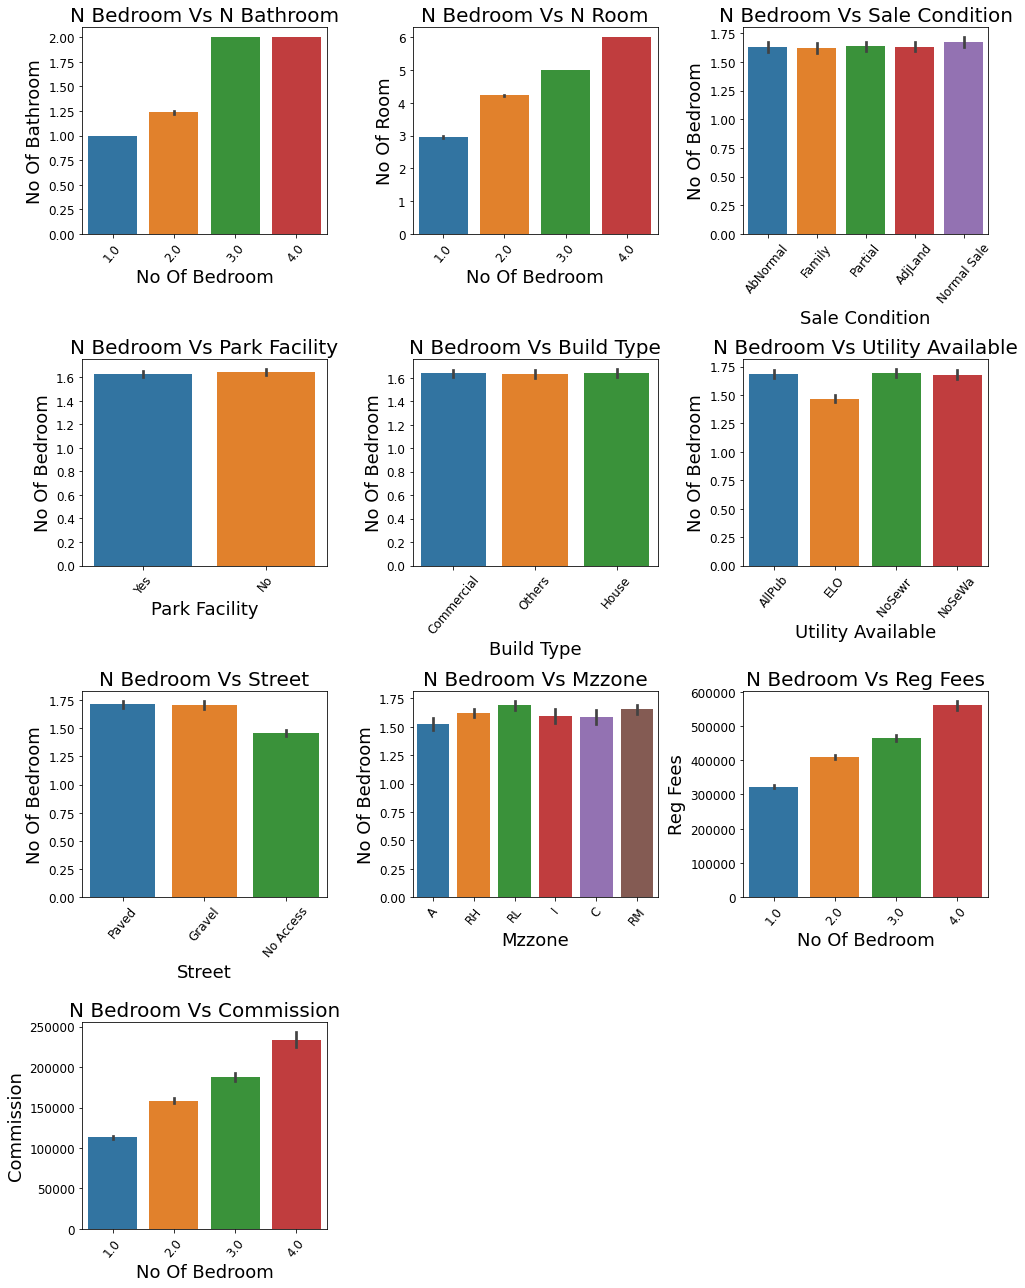

In [40]:
plt.figure(figsize = (14,18))

# No of bedroom vs no of bathroom
plt.subplot(4,3,1)
sns.barplot(df2['N_BEDROOM'],df2['N_BATHROOM'])
plt.title('N Bedroom Vs N Bathroom',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('No Of Bathroom',fontsize = 18)

# No of bedroom vs no of room
plt.subplot(4,3,2)
sns.barplot(df2['N_BEDROOM'],df2['N_ROOM'])
plt.title('N Bedroom Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('No Of Room',fontsize = 18)

# No of bedroom vs sale condition
plt.subplot(4,3,3)
sns.barplot(df2['SALE_COND'],df2['N_BEDROOM'])
plt.title('N Bedroom Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bedroom',fontsize = 18)
plt.xlabel('Sale Condition',fontsize = 18)

# No of bedroom vs Park Facility
plt.subplot(4,3,4)
sns.barplot(df2['PARK_FACIL'],df2['N_BEDROOM'])
plt.title('N Bedroom Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bedroom',fontsize = 18)
plt.xlabel('Park Facility',fontsize = 18)

# No of bedroom vs Build Type
plt.subplot(4,3,5)
sns.barplot(df2['BUILDTYPE'],df2['N_BEDROOM'])
plt.title('N Bedroom Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bedroom',fontsize = 18)
plt.xlabel('Build Type',fontsize = 18)

# No of bedroom vs utility available
plt.subplot(4,3,6)
sns.barplot(df2['UTILITY_AVAIL'],df2['N_BEDROOM'])
plt.title('N Bedroom Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bedroom',fontsize = 18)
plt.xlabel('Utility Available',fontsize = 18)

# No of bedroom vs street
plt.subplot(4,3,7)
sns.barplot(df2['STREET'],df2['N_BEDROOM'])
plt.title('N Bedroom Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bedroom',fontsize = 18)
plt.xlabel('Street',fontsize = 18)

# No of bedroom vs mzzone
plt.subplot(4,3,8)
sns.barplot(df2['MZZONE'],df2['N_BEDROOM'])
plt.title('N Bedroom Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bedroom',fontsize = 18)
plt.xlabel('Mzzone',fontsize = 18)

# No of bedroom vs reg fees
plt.subplot(4,3,9)
sns.barplot(df2['N_BEDROOM'],df2['REG_FEE'])
plt.title('N Bedroom Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Reg Fees',fontsize = 18)

# No of bedroom vs commission
plt.subplot(4,3,10)
sns.barplot(df2['N_BEDROOM'],df2['COMMIS'])
plt.title('N Bedroom Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bedroom',fontsize = 18)
plt.ylabel('Commission',fontsize = 18)

plt.tight_layout()
plt.show()

**No Of Bathroom Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anacond

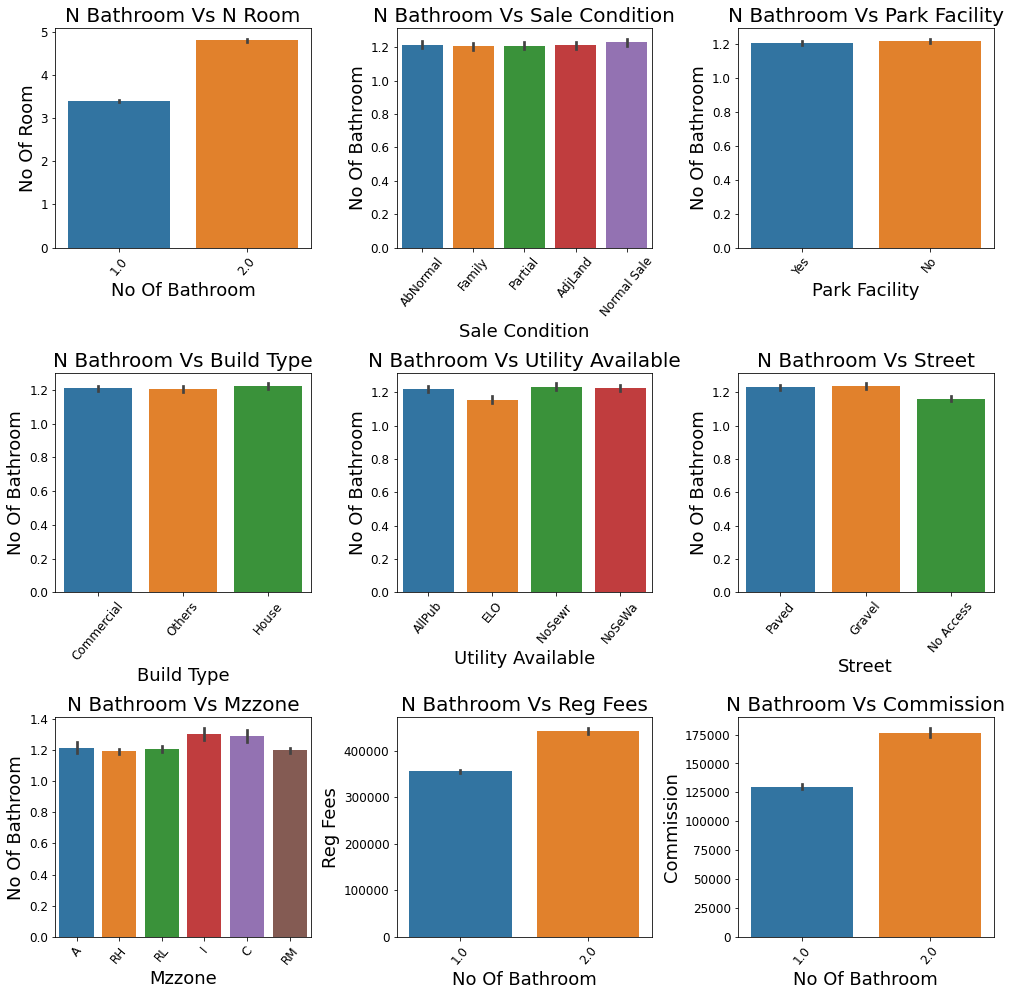

In [41]:
plt.figure(figsize = (14,18))

# No of bathroom vs no of room
plt.subplot(4,3,1)
sns.barplot(df2['N_BATHROOM'],df2['N_ROOM'])
plt.title('N Bathroom Vs N Room',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bathroom',fontsize = 18)
plt.ylabel('No Of Room',fontsize = 18)

# No of bathroom vs sale condition
plt.subplot(4,3,2)
sns.barplot(df2['SALE_COND'],df2['N_BATHROOM'])
plt.title('N Bathroom Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bathroom',fontsize = 18)
plt.xlabel('Sale Condition',fontsize = 18)

# No of bathroom vs Park Facility
plt.subplot(4,3,3)
sns.barplot(df2['PARK_FACIL'],df2['N_BATHROOM'])
plt.title('N Bathroom Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bathroom',fontsize = 18)
plt.xlabel('Park Facility',fontsize = 18)

# No of bathroom vs Build Type
plt.subplot(4,3,4)
sns.barplot(df2['BUILDTYPE'],df2['N_BATHROOM'])
plt.title('N Bathroom Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bathroom',fontsize = 18)
plt.xlabel('Build Type',fontsize = 18)

# No of bathroom vs utility available
plt.subplot(4,3,5)
sns.barplot(df2['UTILITY_AVAIL'],df2['N_BATHROOM'])
plt.title('N Bathroom Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bathroom',fontsize = 18)
plt.xlabel('Utility Available',fontsize = 18)

# No of bathroom vs street
plt.subplot(4,3,6)
sns.barplot(df2['STREET'],df2['N_BATHROOM'])
plt.title('N Bathroom Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bathroom',fontsize = 18)
plt.xlabel('Street',fontsize = 18)

# No of bathroom vs mzzone
plt.subplot(4,3,7)
sns.barplot(df2['MZZONE'],df2['N_BATHROOM'])
plt.title('N Bathroom Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Bathroom',fontsize = 18)
plt.xlabel('Mzzone',fontsize = 18)

# No of bathroom vs reg fees
plt.subplot(4,3,8)
sns.barplot(df2['N_BATHROOM'],df2['REG_FEE'])
plt.title('N Bathroom Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bathroom',fontsize = 18)
plt.ylabel('Reg Fees',fontsize = 18)

# No of bathroom vs commission
plt.subplot(4,3,9)
sns.barplot(df2['N_BATHROOM'],df2['COMMIS'])
plt.title('N Bathroom Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Bathroom',fontsize = 18)
plt.ylabel('Commission',fontsize = 18)

plt.tight_layout()
plt.show()

**No Of Total Room Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anacond

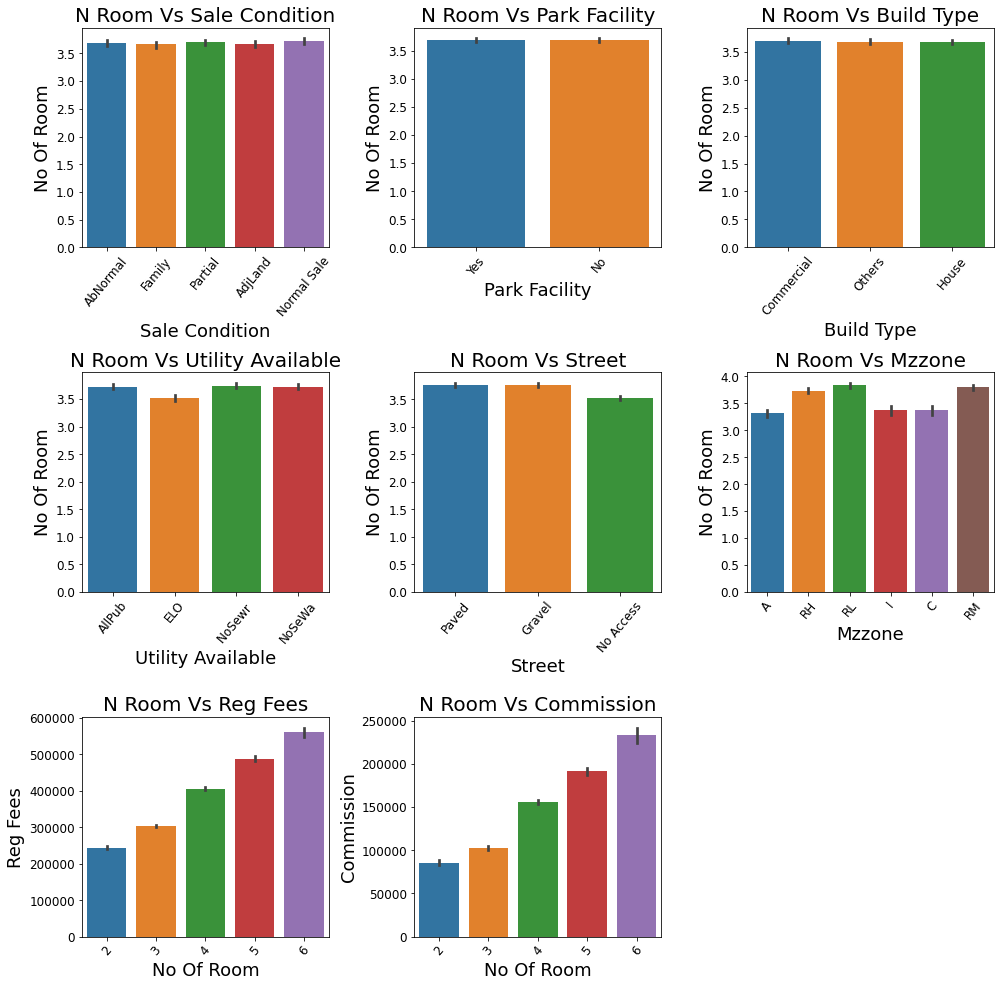

In [42]:
plt.figure(figsize = (14,18))

# No of room vs sale condition
plt.subplot(4,3,1)
sns.barplot(df2['SALE_COND'],df2['N_ROOM'])
plt.title('N Room Vs Sale Condition',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Room',fontsize = 18)
plt.xlabel('Sale Condition',fontsize = 18)

# No of room vs Park Facility
plt.subplot(4,3,2)
sns.barplot(df2['PARK_FACIL'],df2['N_ROOM'])
plt.title('N Room Vs Park Facility',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Room',fontsize = 18)
plt.xlabel('Park Facility',fontsize = 18)

# No of room vs Build Type
plt.subplot(4,3,3)
sns.barplot(df2['BUILDTYPE'],df2['N_ROOM'])
plt.title('N Room Vs Build Type',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Room',fontsize = 18)
plt.xlabel('Build Type',fontsize = 18)

# No of room vs utility available
plt.subplot(4,3,4)
sns.barplot(df2['UTILITY_AVAIL'],df2['N_ROOM'])
plt.title('N Room Vs Utility Available',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Room',fontsize = 18)
plt.xlabel('Utility Available',fontsize = 18)

# No of room vs street
plt.subplot(4,3,5)
sns.barplot(df2['STREET'],df2['N_ROOM'])
plt.title('N Room Vs Street',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Room',fontsize = 18)
plt.xlabel('Street',fontsize = 18)

# No of room vs mzzone
plt.subplot(4,3,6)
sns.barplot(df2['MZZONE'],df2['N_ROOM'])
plt.title('N Room Vs Mzzone',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('No Of Room',fontsize = 18)
plt.xlabel('Mzzone',fontsize = 18)

# No of room vs reg fees
plt.subplot(4,3,7)
sns.barplot(df2['N_ROOM'],df2['REG_FEE'])
plt.title('N Room Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Room',fontsize = 18)
plt.ylabel('Reg Fees',fontsize = 18)

# No of room vs commission
plt.subplot(4,3,8)
sns.barplot(df2['N_ROOM'],df2['COMMIS'])
plt.title('N Room Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('No Of Room',fontsize = 18)
plt.ylabel('Commission',fontsize = 18)

plt.tight_layout()
plt.show()

**Sale Condition Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


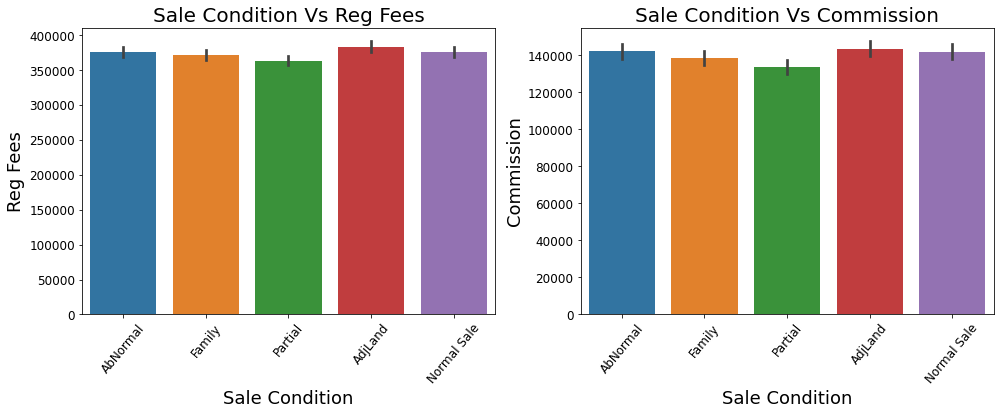

In [43]:
plt.figure(figsize = (14,10))

# Sale condition vs reg fees
plt.subplot(2,2,1)
sns.barplot(df2['SALE_COND'],df2['REG_FEE'])
plt.title('Sale Condition Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Sale Condition',fontsize = 18)

# Sale condition vs commission
plt.subplot(2,2,2)
sns.barplot(df2['SALE_COND'],df2['COMMIS'])
plt.title('Sale Condition Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Sale Condition',fontsize = 18)

plt.tight_layout()
plt.show()

**Park Facility Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


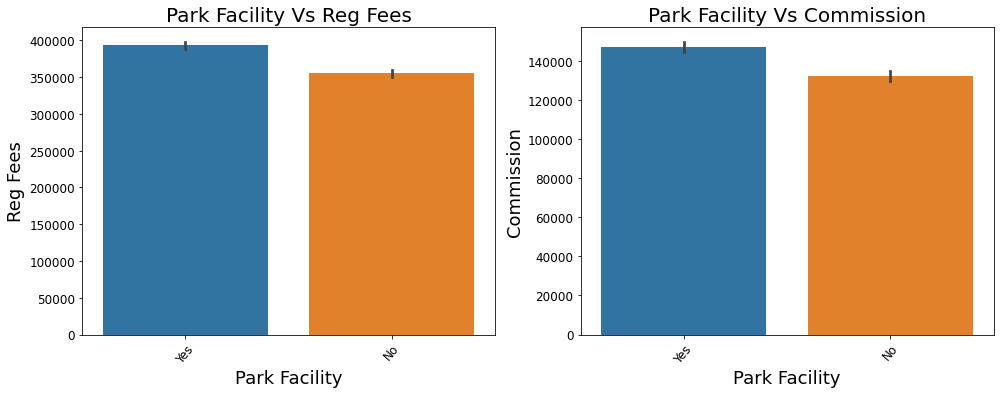

In [44]:
plt.figure(figsize = (14,10))

# Park facility vs reg fees
plt.subplot(2,2,1)
sns.barplot(df2['PARK_FACIL'],df2['REG_FEE'])
plt.title('Park Facility Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Park Facility',fontsize = 18)

# Park facility vs commission
plt.subplot(2,2,2)
sns.barplot(df2['PARK_FACIL'],df2['COMMIS'])
plt.title('Park Facility Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Park Facility',fontsize = 18)

plt.tight_layout()
plt.show()

**Build Type Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


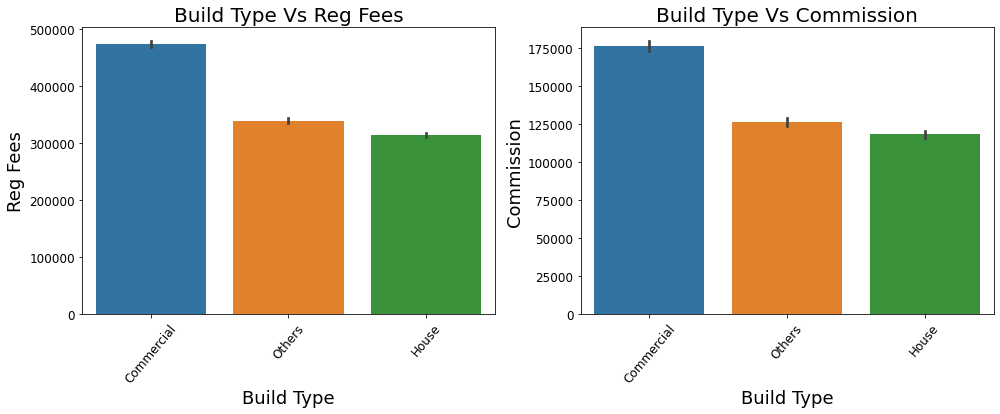

In [45]:
plt.figure(figsize = (14,10))

# Build type vs reg fees
plt.subplot(2,2,1)
sns.barplot(df2['BUILDTYPE'],df2['REG_FEE'])
plt.title('Build Type Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Build Type',fontsize = 18)

# Build type vs commission
plt.subplot(2,2,2)
sns.barplot(df2['BUILDTYPE'],df2['COMMIS'])
plt.title('Build Type Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Build Type',fontsize = 18)

plt.tight_layout()
plt.show()

**Utility Available Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


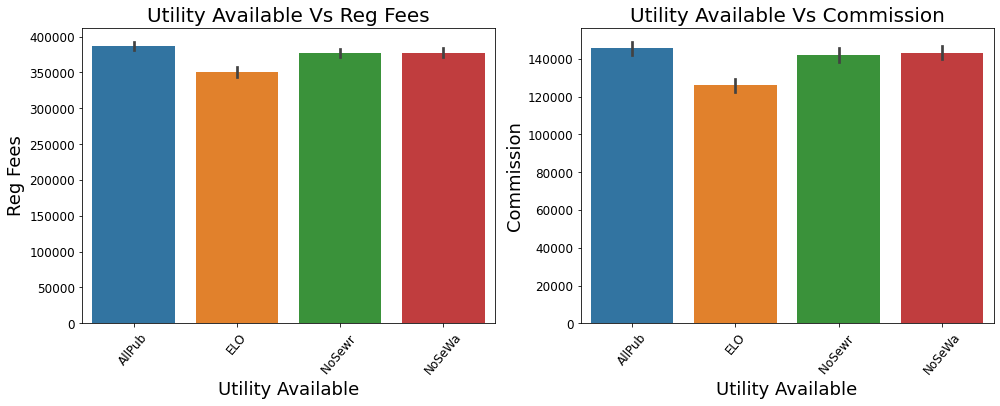

In [46]:
plt.figure(figsize = (14,10))

# Utility available vs reg fees
plt.subplot(2,2,1)
sns.barplot(df2['UTILITY_AVAIL'],df2['REG_FEE'])
plt.title('Utility Available Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Utility Available',fontsize = 18)

# Utility available vs commission
plt.subplot(2,2,2)
sns.barplot(df2['UTILITY_AVAIL'],df2['COMMIS'])
plt.title('Utility Available Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Utility Available',fontsize = 18)

plt.tight_layout()
plt.show()

**Street Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


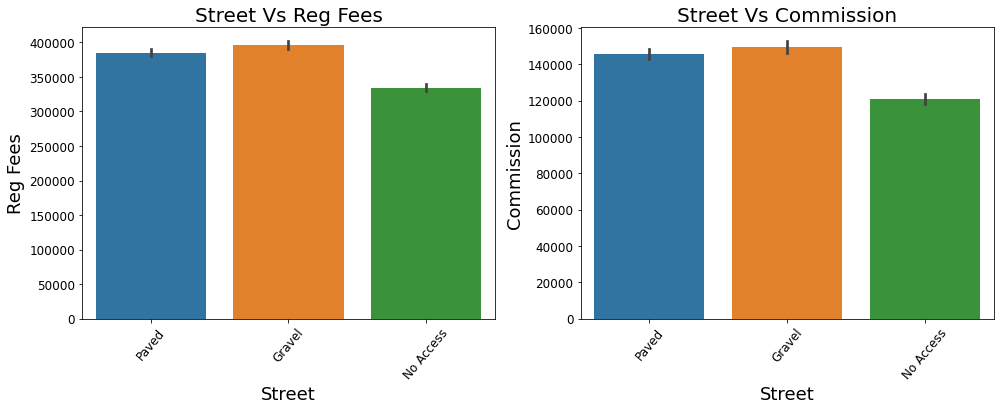

In [47]:
plt.figure(figsize = (14,10))

# Street vs reg fees
plt.subplot(2,2,1)
sns.barplot(df2['STREET'],df2['REG_FEE'])
plt.title('Street Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Street',fontsize = 18)

# Street vs commission
plt.subplot(2,2,2)
sns.barplot(df2['STREET'],df2['COMMIS'])
plt.title('Street Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Street',fontsize = 18)

plt.tight_layout()
plt.show()

**Mzzone Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


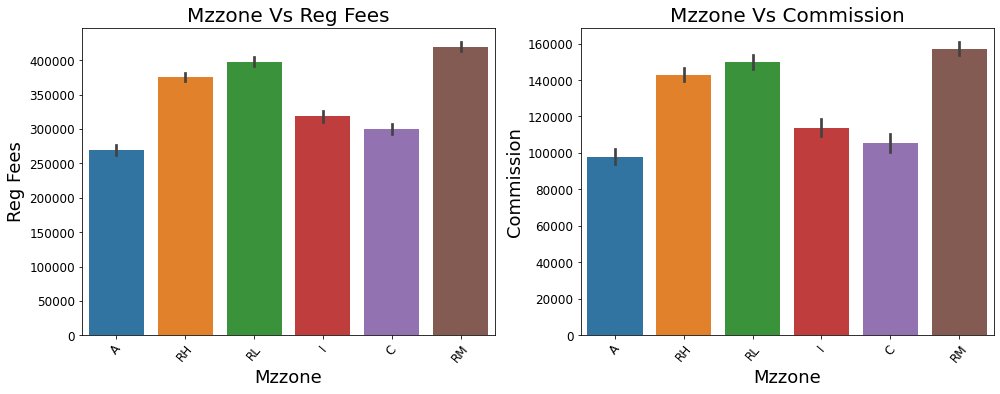

In [48]:
plt.figure(figsize = (14,10))

# Mzzone vs reg fees
plt.subplot(2,2,1)
sns.barplot(df2['MZZONE'],df2['REG_FEE'])
plt.title('Mzzone Vs Reg Fees',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Reg Fees',fontsize = 18)
plt.xlabel('Mzzone',fontsize = 18)

# Mzzone vs commission
plt.subplot(2,2,2)
sns.barplot(df2['MZZONE'],df2['COMMIS'])
plt.title('Mzzone Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Mzzone',fontsize = 18)

plt.tight_layout()
plt.show()

**Reg Fees Vs Commission**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


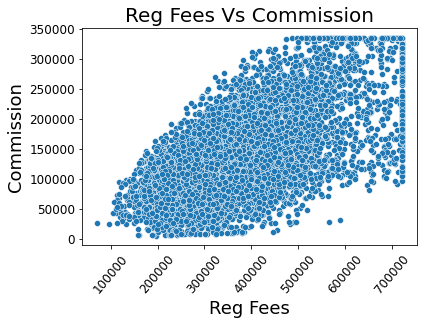

In [49]:
# Reg fees vs commission
sns.scatterplot(df2['REG_FEE'], df2['COMMIS'])
plt.title('Reg Fees Vs Commission',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Commission',fontsize = 18)
plt.xlabel('Reg Fees',fontsize = 18)

plt.show()

In [50]:
# copy of dataframe
df3 = df2.copy()

In [51]:
# find house age and assign in new column
df3['HOUSE_AGE'] = df3['DATE_SALE']-df3['DATE_BUILD']
df3['HOUSE_AGE'] = df3['HOUSE_AGE'].astype(str)
df3['HOUSE_AGE'] = df3['HOUSE_AGE'].str.split().str[0]
df3['HOUSE_AGE'] = df3['HOUSE_AGE'].astype(int)
df3['HOUSE_AGE'] = round(df3['HOUSE_AGE']/365,2)

In [52]:
df3.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000.00,144400.0,7600000.0,43.92
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,720157.75,304049.0,20079187.5,11.00
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,421094.00,92114.0,13159200.0,19.59
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321.00,77042.0,9630290.0,22.00
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000.00,74063.0,7406250.0,29.59


In [53]:
# drop unuseful column
df3.drop(['DATE_SALE','DATE_BUILD'],axis = 1, inplace = True)

In [54]:
df3.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,380000.00,144400.0,7600000.0,43.92
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,720157.75,304049.0,20079187.5,11.00
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,421094.00,92114.0,13159200.0,19.59
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,356321.00,77042.0,9630290.0,22.00
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,237000.00,74063.0,7406250.0,29.59


**Target Vs All Features**

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anacond

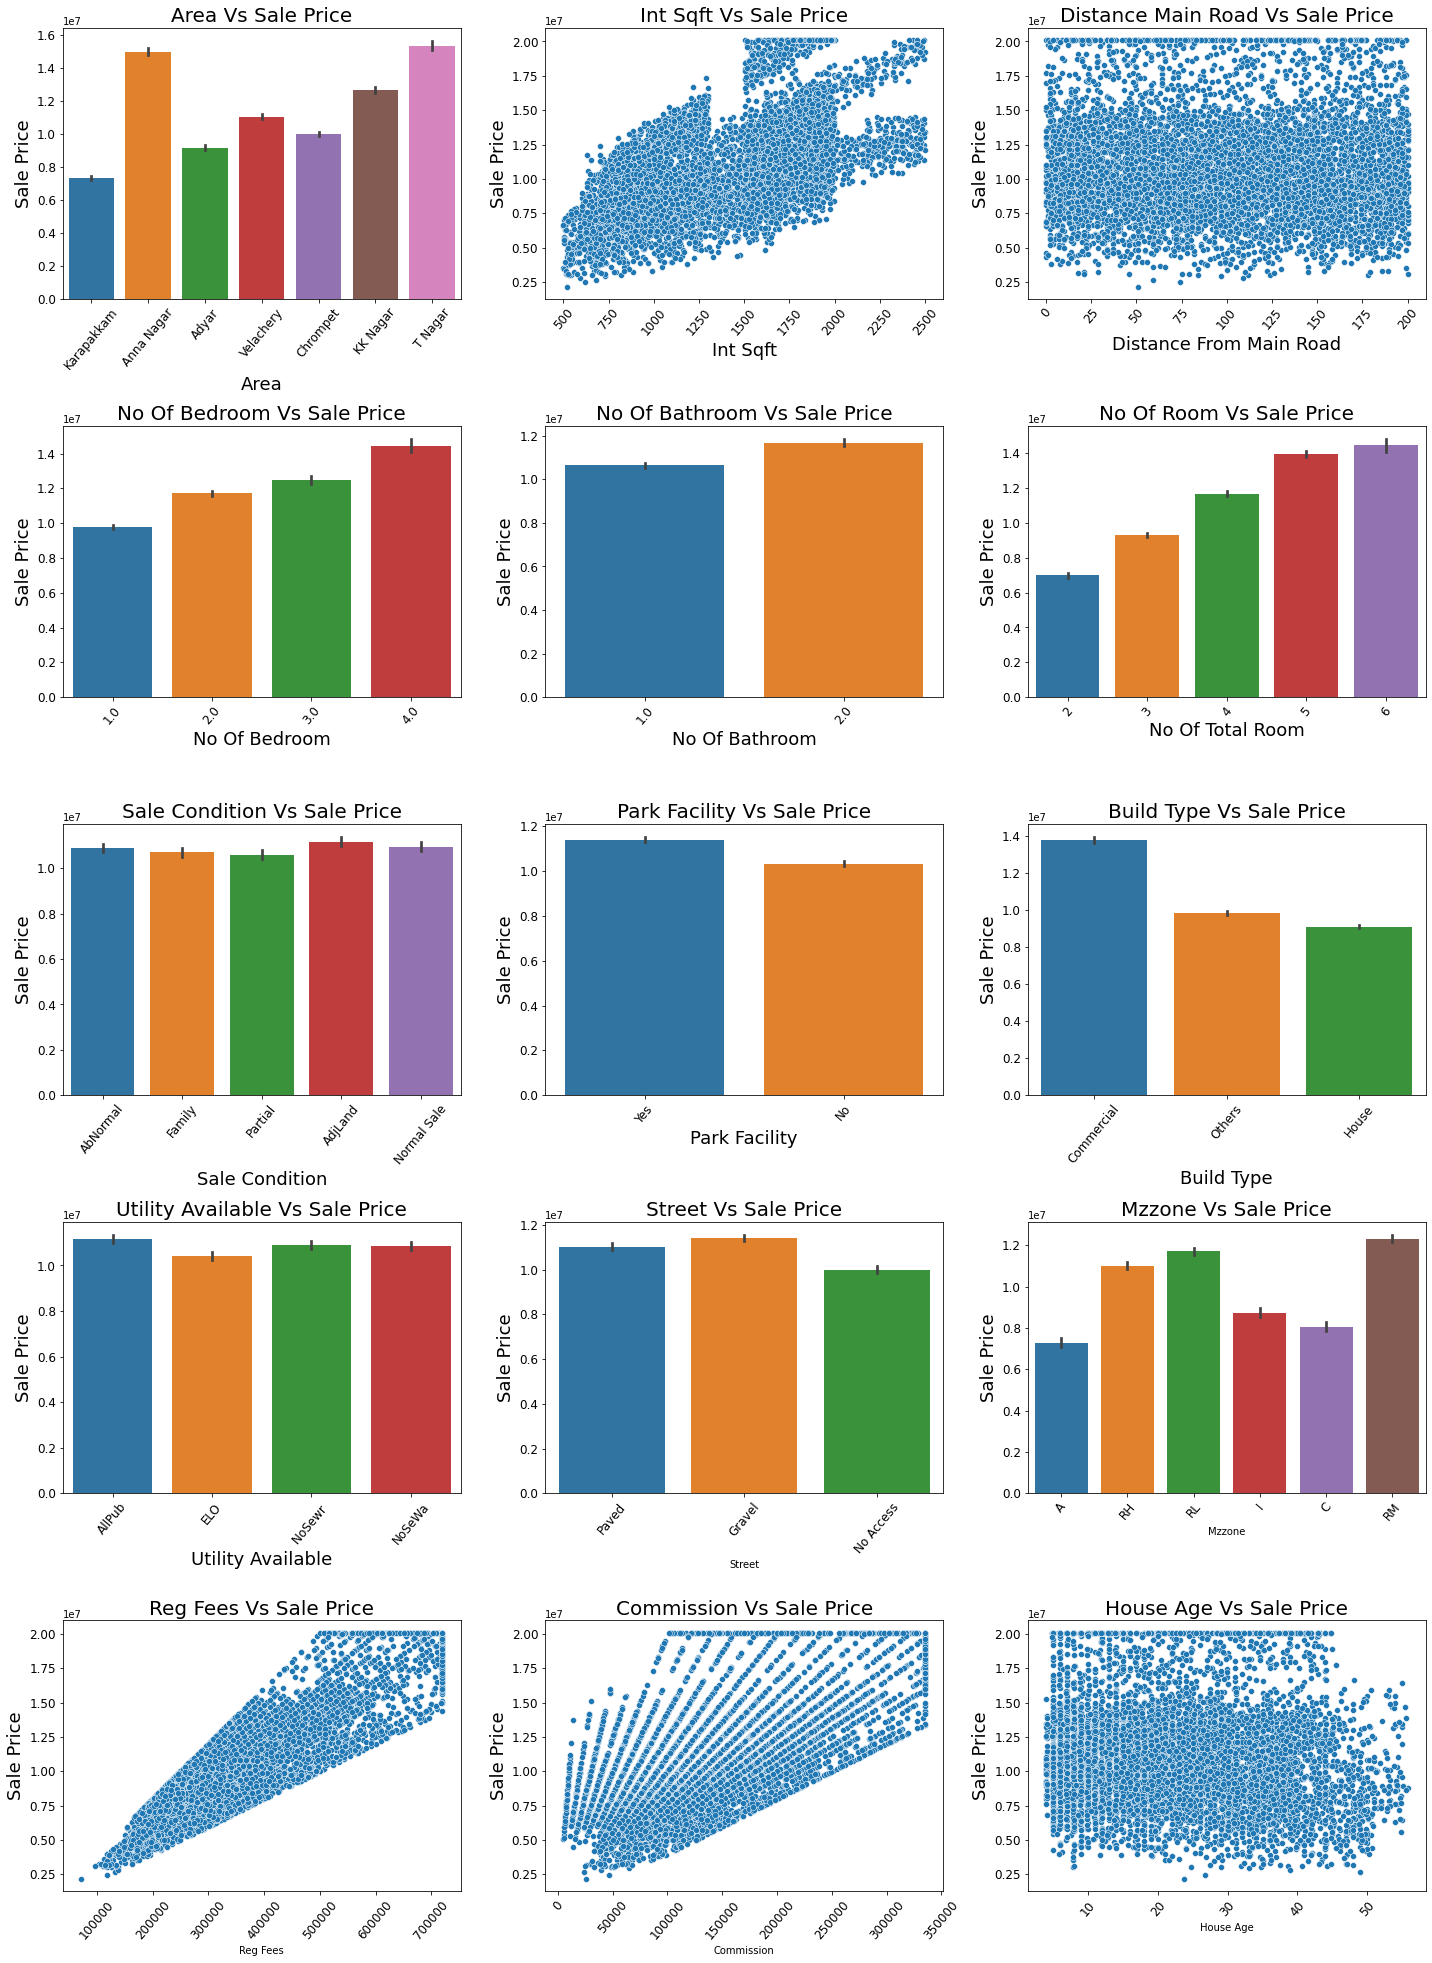

In [55]:
plt.figure(figsize = (20,32))

# Area vs Sale Price
plt.subplot(6,3,1)
sns.barplot(df3['AREA'],df3['SALES_PRICE'])
plt.title('Area Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Area',fontsize = 18)

# Int sqft vs Sale Price
plt.subplot(6,3,2)
sns.scatterplot(df3['INT_SQFT'],df3['SALES_PRICE'])
plt.title('Int Sqft Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Int Sqft',fontsize = 18)

# Distance main road vs Sale Price
plt.subplot(6,3,3)
sns.scatterplot(df3['DIST_MAINROAD'],df3['SALES_PRICE'])
plt.title('Distance Main Road Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Distance From Main Road',fontsize = 18)

# Number of bedroom vs Sale Price
plt.subplot(6,3,4)
sns.barplot(df3['N_BEDROOM'],df3['SALES_PRICE'])
plt.title('No Of Bedroom Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('No Of Bedroom',fontsize = 18)

# Number of bathroom vs Sale Price
plt.subplot(6,3,5)
sns.barplot(df3['N_BATHROOM'],df3['SALES_PRICE'])
plt.title('No Of Bathroom Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('No Of Bathroom',fontsize = 18)

# Number of total room vs Sale Price
plt.subplot(6,3,6)
sns.barplot(df3['N_ROOM'],df3['SALES_PRICE'])
plt.title('No Of Room Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('No Of Total Room',fontsize = 18)

# Sale condition vs Sale Price
plt.subplot(6,3,7)
sns.barplot(df3['SALE_COND'],df3['SALES_PRICE'])
plt.title('Sale Condition Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Sale Condition',fontsize = 18)

# Park facility vs Sale Price
plt.subplot(6,3,8)
sns.barplot(df3['PARK_FACIL'],df3['SALES_PRICE'])
plt.title('Park Facility Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Park Facility',fontsize = 18)

# Build type vs Sale Price
plt.subplot(6,3,9)
sns.barplot(df3['BUILDTYPE'],df3['SALES_PRICE'])
plt.title('Build Type Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Build Type',fontsize = 18)

# Utility available vs Sale Price
plt.subplot(6,3,10)
sns.barplot(df3['UTILITY_AVAIL'],df3['SALES_PRICE'])
plt.title('Utility Available Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Utility Available',fontsize = 18)

# Street vs Sale Price
plt.subplot(6,3,11)
sns.barplot(df3['STREET'],df3['SALES_PRICE'])
plt.title('Street Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Street')

# Mzzone vs Sale Price
plt.subplot(6,3,12)
sns.barplot(df3['MZZONE'],df3['SALES_PRICE'])
plt.title('Mzzone Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Mzzone')

# Reg fees vs Sale Price
plt.subplot(6,3,13)
sns.scatterplot(df3['REG_FEE'],df3['SALES_PRICE'])
plt.title('Reg Fees Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Reg Fees')

# Commission vs Sale Price
plt.subplot(6,3,14)
sns.scatterplot(df3['COMMIS'],df3['SALES_PRICE'])
plt.title('Commission Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('Commission')

# House age vs Sale Price
plt.subplot(6,3,15)
sns.scatterplot(df3['HOUSE_AGE'],df3['SALES_PRICE'])
plt.title('House Age Vs Sale Price',fontsize = 20)
plt.xticks(rotation = 50,fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Sale Price',fontsize = 18)
plt.xlabel('House Age')

plt.tight_layout()
plt.show()


# Data Encoding

In [56]:
# create new dataframe
df4 = df3.copy()

In [57]:
# Data encoding of area column
df4['AREA'] = df4['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

# Data encoding of sale condition column
df4['SALE_COND'] = df4['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})

# Data encoding of park facility column
df4['PARK_FACIL'] = df4['PARK_FACIL'].map({'No':1,'Yes':2})

# Data encoding of build type column
df4['BUILDTYPE'] = df4['BUILDTYPE'].map({'House':1,'Others':2,'Commercial':3})

# Data encoding of utility available column
df4['UTILITY_AVAIL'] = df4['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'AllPub':4})

# Data encoding of street column
df4['STREET'] = df4['STREET'].map({'No Access':1,'Paved':2,'Gravel':3})

# Data encoding of mzzone column
df4['MZZONE'] = df4['MZZONE'].map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})

In [58]:
df4.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
0,1,1004,131,1.0,1.0,3,3,2,3,4,2,1,380000.00,144400.0,7600000.0,43.92
1,6,1986,26,2.0,1.0,5,3,1,3,4,3,4,720157.75,304049.0,20079187.5,11.00
2,2,909,70,1.0,1.0,3,3,2,3,1,3,5,421094.00,92114.0,13159200.0,19.59
3,4,1855,14,3.0,2.0,5,2,1,2,3,2,3,356321.00,77042.0,9630290.0,22.00
4,1,1226,84,1.0,1.0,3,3,2,2,4,3,2,237000.00,74063.0,7406250.0,29.59
